# Introduction

[Cylc](https://cylc.github.io/cylc/) is a workflow engine, written in Python, and used by [NIWA](https://niwa.co.nz), [MetOffice](http://www.metoffice.gov.uk/) and others. It handles continuous workflows of cycling tasks. We will learn more about cylc, how it can be used, its features and more on this notebook.

## Installation

The cylc software can be obtained from [GitHub](https://github.com/cylc/). The [installation instructions](https://github.com/cylc/cylc/blob/master/INSTALL.md) are easy to follow and should work on most Linux distributions. 

You will need a computer with Linux and Python 2.x, where you can also install other software and libraries such as Jinja2 and graphviz.

There is also a [section in the FAQ](https://cylc.github.io/cylc/faq.html#how-do-i-install-cylc) that covers how to install cylc.

You can check the cylc installation by running the following command.

In [1]:
!cylc check-software

Checking your software...

Individual results:
Package (version requirements)                           Outcome (version found)
                              *REQUIRED SOFTWARE*                              
Python (2.6+, <3)..................FOUND & min. version MET (2.7.15.candidate.1)

        *OPTIONAL SOFTWARE for the GUI & dependency graph visualisation*        
Python:pygtk (2.0+)............................FOUND & min. version MET (2.24.0)
graphviz (any)....................................................FOUND (2.40.1)
Python:pygraphviz (any)...........................................FOUND (1.4rc1)

                  *OPTIONAL SOFTWARE for the HTML User Guide*                  
ImageMagick (any)................................................FOUND (6.9.7-4)

             *OPTIONAL SOFTWARE for the HTTPS communications layer*             
Python:urllib3 (any)................................................FOUND (1.23)
Python:OpenSSL (any).........................................

It is recommended that you fix any warnings before proceeding with the rest of this notebook.

## A Cycling Workflow Example

The following example is intended to convey something of cylc’s basic functionality. However, it barely scratches the surface; to understand more, read the [User Guide](https://cylc.github.io/cylc/documentation.html#the-cylc-user-guide).

We will register a suite in cylc, called my.suite. But before registering the suite, we will trigger the command to unregister any suite with the same name. That way you can also run this notebook multiple times with no error.

In [2]:
!cylc unregister my.suite

cylc unregister: unknown utility. Abort.
Type "cylc help all" for a list of utilities.


As you may have noticed, the command says how many test suites were unregistered. Now we can register the suite.

In [3]:
!cylc register my.suite $PWD/../data/cycling-workflow-example-suite/

REGISTER my.suite: /home/kinow/Development/python/workspace/cylc-notebook/notebooks/../data/cycling-workflow-example-suite/


Again, the command will give clear indication of whether the suite was successfully registered or not, and will also indicate the location of the new suite. Let's print some information about our suite.

In [4]:
!cylc db print my.suite

cylc db: unknown utility. Abort.
Type "cylc help all" for a list of utilities.


You can edit the suite with the command `cylc edit my.suite`.

Before running the suite, let's check if it is valid, and take a look at a grap of our suite.

In [5]:
!cylc validate my.suite

Valid for cylc-7.7.1-200-gad0b7e-dirty


And we can also visualize our suite as a graph.

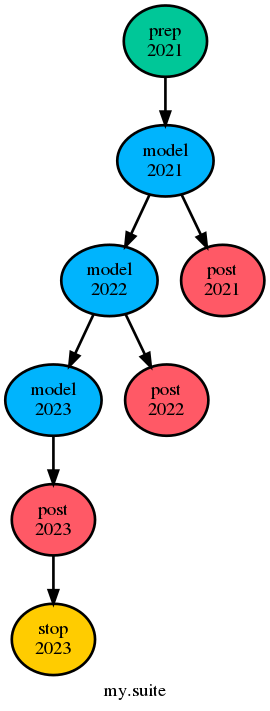

In [6]:
# remove any existing image
!rm -f mysuite.png
# plot suite
!cylc graph my.suite --output-file mysuite.png
# embed into the notebook
from IPython.display import Image
Image(filename='mysuite.png')

Finally, to run the suite, we can submit it from the command line with the following command.

In [7]:
!cylc run my.suite

            ._.                                                       
            | |        The Cylc Suite Engine [7.7.1-200-gad0b7e-dirty]
._____._. ._| |_____.           Copyright (C) 2008-2018 NIWA          
| .___| | | | | .___|   & British Crown (Met Office) & Contributors.  
| !___| !_! | | !___.  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
!_____!___. |_!_____!  This program comes with ABSOLUTELY NO WARRANTY;
      .___! |          see `cylc warranty`.  It is free software, you 
      !_____!           are welcome to redistribute it under certain  

*** listening on kinow-VirtualBox:43090 ***

To view suite server program contact information:
 $ cylc get-suite-contact my.suite

Other ways to see if the suite is still running:
 $ cylc scan -n 'my.suite' kinow-VirtualBox
 $ cylc ping -v --host=kinow-VirtualBox my.suite
 $ ps -opid,args 15190  # on kinow-VirtualBox



And to get the job output, it is just a matter of running one more command.

In [8]:
!cylc log -o my.suite model.2021

Suite    : my.suite
Task Job : 2021/model/01 (try 1)
User@Host: kinow@kinow-VirtualBox

my FOOD is icecream
2018-10-19T13:38:07+13:00 INFO - started
2018-10-19T13:38:17+13:00 INFO - succeeded


You can also run the suite using a GUI with `gcylc my.suite`

That's it. This was a short introduction to cylc, with a simple working example. For more, please go to the [cylc website](https://cylc.github.io/cylc/), or check the [User Guide](https://cylc.github.io/cylc/documentation.html#the-cylc-user-guide).

Happy cycling!